# Machine Learning (Only Transaction Features)

## Modules and functions

Import all the modules:

In [1]:
import pandas as pd

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

from notebooks import *

## Loading

In [2]:
df_file_path = "dataset-filtered.csv"
df = pd.read_csv(df_file_path, low_memory=False)

In [3]:
print_dimensions(df)

The dataset has 158863 rows and 434 columns


## Prepare data

In [4]:
addresses, X, y_binary, y_multi, scaler, feature_names = extract_experiment_data(df, ["transaction"])

Scaled columns:
internal_transaction_count: [0, 1536860]
normal_transaction_block_span: [0, 6415588]
normal_transaction_count: [1, 10412943]
normal_transaction_block_delta_mean: [0, 3693174]
normal_transaction_block_delta_std: [0, 2248615]
normal_transaction_count_per_block_mean: [1, 49]
normal_transaction_count_per_block_std: [0, 74]
normal_transaction_gas_mean: [23112, 8003887]
normal_transaction_gas_std: [0, 3985463]
normal_transaction_gas_used_mean: [21421, 7906343]
normal_transaction_gas_used_std: [0, 3717662]
normal_transaction_time_delta_mean: [0, 57482326]
normal_transaction_time_delta_std: [0, 34437373]
normal_transaction_value_mean: [0, 204365823294587692646400]
normal_transaction_value_std: [0, 1285685747689323210211328]

Extracted values:
addresses (158863,)
features (158863, 20)
labels_binary (158863,)
labels_multi (158863,)


In [5]:
for feature_name in feature_names:
    print(feature_name)

internal_transaction_count
normal_transaction_block_span
normal_transaction_count
normal_transaction_block_delta_mean
normal_transaction_block_delta_std
normal_transaction_count_per_block_mean
normal_transaction_count_per_block_std
normal_transaction_gas_mean
normal_transaction_gas_std
normal_transaction_gas_used_mean
normal_transaction_gas_used_std
normal_transaction_time_delta_mean
normal_transaction_time_delta_std
normal_transaction_value_mean
normal_transaction_value_std
has_internal_transactions
normal_transaction_before_creation_ratio
normal_transaction_block_ratio
normal_transaction_from_other_ratio
normal_transaction_other_sender_ratio


## Classification

In [6]:
xgb_scale_pos_weight = compute_scale_pos_weight(y_binary)

In [7]:
def create_xgb_model():
    return XGBClassifier(n_jobs=10,
                         scale_pos_weight=xgb_scale_pos_weight,
                         n_estimators=25,
                         max_depth=3)

In [8]:
xgb_models = train_test_folds(X,
                              y_binary,
                              k_fold(X, n_splits=10),
                              create_xgb_model)

train ROC AUC 0.964 TN  140434 FP  2273 FN    15 TP   254
test  ROC AUC 0.954 TN  15611 FP   250 FN     2 TP    24
train score - test score = 0.010

train ROC AUC 0.961 TN  140334 FP  2366 FN    17 TP   259
test  ROC AUC 0.992 TN  15626 FP   242 FN     0 TP    19
train score - test score = -0.031

train ROC AUC 0.962 TN  140375 FP  2334 FN    16 TP   251
test  ROC AUC 0.973 TN  15571 FP   288 FN     1 TP    27
train score - test score = -0.011

train ROC AUC 0.968 TN  140013 FP  2694 FN    12 TP   258
test  ROC AUC 0.970 TN  15546 FP   315 FN     1 TP    24
train score - test score = -0.002

train ROC AUC 0.965 TN  140588 FP  2131 FN    14 TP   244
test  ROC AUC 0.938 TN  15608 FP   241 FN     4 TP    33
train score - test score = 0.027

train ROC AUC 0.964 TN  140626 FP  2088 FN    15 TP   248
test  ROC AUC 0.929 TN  15599 FP   255 FN     4 TP    28
train score - test score = 0.035

train ROC AUC 0.967 TN  140112 FP  2598 FN    13 TP   254
test  ROC AUC 0.990 TN  15550 FP   308 FN    

In [9]:
feature_importance = compute_average_feature_importance(X, xgb_models)

In [10]:
display(create_feature_importance_table(feature_names, feature_importance, size=10))

,Feature,Importance
0,normal_transaction_value_mean,0.586558
1,normal_transaction_value_std,0.117065
2,normal_transaction_gas_used_std,0.077719
3,normal_transaction_count,0.070335
4,internal_transaction_count,0.035327
5,normal_transaction_block_span,0.033554
6,normal_transaction_gas_used_mean,0.026203
7,normal_transaction_gas_mean,0.017259
8,normal_transaction_gas_std,0.015203
9,normal_transaction_block_delta_mean,0.009225


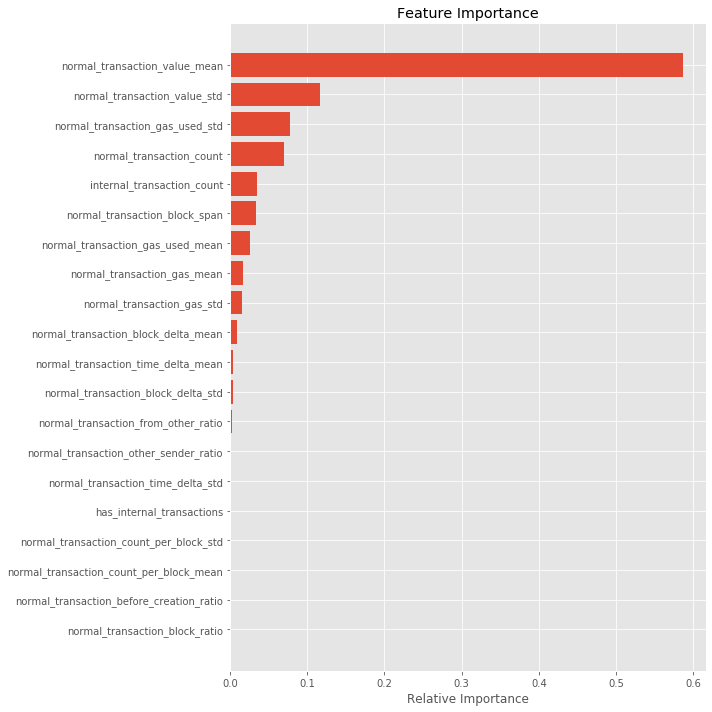

In [11]:
plot_feature_importance(feature_names, feature_importance)